In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename="Datasets/Logistic/Nature-Logistic/TestingA general model for ontogenetic.xlsx"
title='Guppy'
measured_data=pd.read_excel("/content/drive/MyDrive/ScientificProjects/PopulationGrowthModels/Readings/{}".format(filename),sheet_name=title)
measured_data=measured_data.dropna(subset=[measured_data.columns[1]])
measured_data

,Days,Mass (g),Pred,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,initial,0.00977777777777778,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0.000000,0.009778,0.009778,0.995587,NaN,NaN,NaN,max,0.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.073171,0.015111,0.016584,NaN,NaN,NaN,NaN,inflection,0.080000,f,0.533333,NaN,NaN,NaN,NaN,NaN,NaN,0.061545
2,14.390244,0.030222,0.027793,NaN,NaN,NaN,NaN,k,0.075586,p1,191.666667,t1,24.242424,NaN,NaN,NaN,NaN,0.078419
3,21.707317,0.050444,0.044508,NaN,NaN,NaN,NaN,Comments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075586
4,29.268293,0.070667,0.067428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067577
5,36.585366,0.086000,0.092049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,43.902439,0.111556,0.114169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,51.341463,0.116444,0.130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,58.658537,0.126667,0.139891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,66.097561,0.136667,0.145096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
p_0=0.00977777777777778
m=.15
p_inf=.07
step=.0001
k=0.0784187717364905
f=p_inf/m
A=((f*f*m)-(2*f*p_0)+p_0)/((f*f*m*p_0)-(f*f*m*m))
B=-m*A
C=(((p_0-m)*A)-1)/p_0

p_prev=float()
t_prev=float()
dt=float()
rate=float()

print("A",A)
print("B",B)
print("C",C)

predicted=[]
predicted.append(p_0)
ts=[]
ts.append(0)

for  p in np.linspace(p_0,m,int((m-p_0)/step),True):
  if p==np.linspace(p_0,m,int((m-p_0)/step),True).max():
    print("For p={}==================".format(p))
    print("Break!")
    break
  if p==p_0:
    p_prev=p_0
    t_prev=0
    print("For p0= {}, the t={}".format(p_prev,t_prev))
  else:
    rate=k*((A*p*p)+(B*p))/(1+(C*p))
    dt=(p-p_prev)/rate
    t_prev+=dt
    ts.append(t_prev)
    p_prev=p
    predicted.append(p)
    print("For p= {}, t={}".format(p_prev,t_prev))

A -0.00048828125
B 1.0
C -0.00048828125
For p0= 2, the t=0
For p= 3.000488997555012, t=0.481055093490643
For p= 4.000977995110024, t=0.8418170164506267
For p= 5.001466992665037, t=1.1304124460222522
For p= 6.001955990220049, t=1.3709007997503428
For p= 7.0024449877750605, t=1.577028876123149
For p= 8.002933985330074, t=1.7573877942252258
For p= 9.003422982885086, t=1.91770465571005
For p= 10.003911980440098, t=2.061988263768442
For p= 11.00440097799511, t=2.1931540144642554
For p= 12.004889975550121, t=2.3133883954686785
For p= 13.005378973105135, t=2.4243732824313264
For p= 14.005867970660146, t=2.5274301239109223
For p= 15.006356968215158, t=2.623616061530141
For p= 16.00684596577017, t=2.7137900107468145
For p= 17.007334963325185, t=2.798659304986567
For p= 18.007823960880195, t=2.8788133823682696
For p= 19.00831295843521, t=2.954748607045636
For p= 20.00880195599022, t=3.0268868849101107
For p= 21.009290953545232, t=3.0955898467772225
For p= 22.009779951100242, t=3.1611698079782573

In [ ]:
t_list=[]
p_list=[]


for i,v in enumerate(measured_data[measured_data.columns[0]]):
  print("For original data t = {}".format(v))
  for I,V in enumerate(ts):
    if v==V:
      t_list.append(V)
      p_list.append(predicted[I])
      print("Appended for t = {}".format(v))
      break
    elif V<v:
      t_prev=V
      p_prev=predicted[I]
      continue
    elif V>v:
      t_suc=V
      p_suc=predicted[I]
      t_list.append(V)
      p=p_suc-((t_suc-V)*(p_suc-p_prev)/(t_suc-t_prev))
      p_list.append(p)
      print("For t = {} appended p = {}".format(v,p))
      break

try:
  R2=np.corrcoef(list(measured_data[measured_data.columns[1]]), p_list)[0,1]
except ValueError:
  R2=np.corrcoef(list(measured_data[measured_data.columns[1]][:-1]), p_list)[0,1]
print('R2 = {}'.format(R2))

For original data t = 0
Appended for t = 0
For original data t = 1
For t = 1 appended p = 54.46153846153846
For original data t = 2
For t = 2 appended p = 106.92307692307692
For original data t = 3
For t = 3 appended p = 264.3076923076923
For original data t = 4
For t = 4 appended p = 526.6153846153846
For original data t = 5
For t = 5 appended p = 998.7692307692307
For original data t = 6
For t = 6 appended p = 1995.5384615384614
For original data t = 7
For original data t = 8
For original data t = 9
For original data t = 10


ValueError: ignored

In [ ]:
plt.figure(figsize=(10,6));

plt.plot(ts,predicted);
plt.scatter(measured_data[measured_data.columns[0]],measured_data[measured_data.columns[1]],c='#ff7f0e');
plt.xlabel(measured_data.columns[0])
plt.ylabel(measured_data.columns[1])
plt.legend(['Predicted','Original Measured'])
plt.title(title)
plt.text(x=30,y=.01,s='p_0 = '+str(p_0)+'\n'+'m = '+str(m)+'\n'+'p_inf = '+str(p_inf)+'\n'+'k = '+str(k)+'\n'+'R2 = '+str(R2)+'\n'+'t_max = '+str(ts[-1]+step)+'\n'+'step = '+str(step)+'\n'+'f = '+str(f)+'\n'+'source: '+filename)

'''print("p_0 = {}".format(p_0))
print("m = {}".format(m))
print("p_inf = {}".format(p_inf))
print("k = {}".format(k))
print("step = {}".format(step))''';

p_0 = 0.00977777777777778
m = 0.15
p_inf = 0.07
k = 0.0784187717364905
step = 0.0001
f = 0.46666666666666673


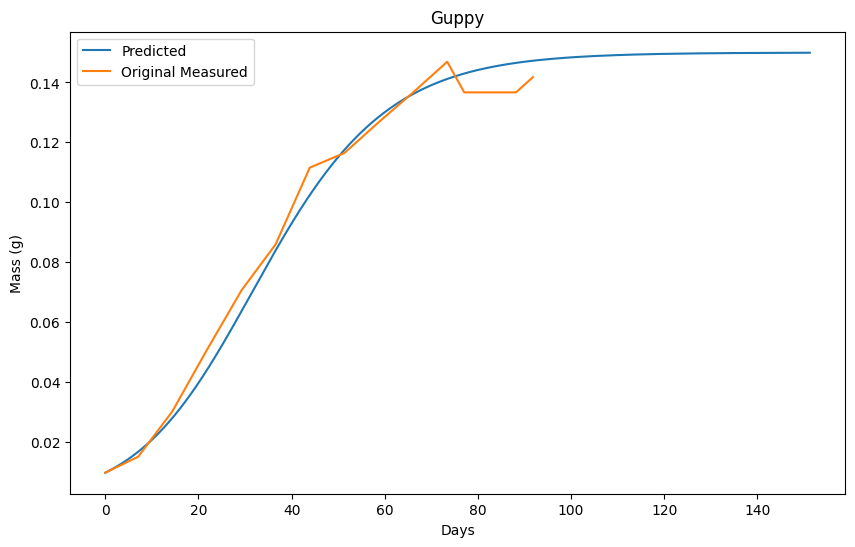

In [ ]:
plt.figure(figsize=(10,6));

plt.plot(ts,predicted);
plt.plot(measured_data[measured_data.columns[0]],measured_data[measured_data.columns[1]],c='#ff7f0e');
plt.xlabel(measured_data.columns[0])
plt.ylabel(measured_data.columns[1])
plt.legend(['Predicted','Original Measured'])
plt.title(title)

print("p_0 = {}".format(p_0))
print("m = {}".format(m))
print("p_inf = {}".format(p_inf))
print("k = {}".format(k))
print("step = {}".format(step))
print("f = {}".format(f))

In [ ]:
pd.DataFrame(p_list).to_excel('pandas_to_excel_no_index_header.xlsx', index=False, header=False)

In [ ]:
"""ps=[]
ps.append(p_0)
ts=[]
ts.append(0)

for  p in np.linspace(p_0,m,int((m-p_0)/step),True):
  print("For p={}========",format(p))
  if p==np.linspace(p_0,m,int((m-p_0)/step),True).max():
    print("Break!")
    break
  if p==p_0:
    p_prev=p_0
    t_prev=0
    print("For p0= {}, the t={}".format(p_prev,t_prev))
  else:
    rate=k*((A*p*p)+(B*p))/(1+(C*p))
    dt=(p-p_prev)/rate
    t_prev+=dt
    ts.append(t_prev)
    p_prev=p
    ps.append(p)
    print("For p= {}, t={}".format(p_prev,t_prev))"""

'ps=[]\nps.append(p_0)\nts=[]\nts.append(0)\n\nfor  p in np.linspace(p_0,m,int((m-p_0)/step),True):\n  print("For p={}========",format(p))\n  if p==np.linspace(p_0,m,int((m-p_0)/step),True).max():\n    print("Break!")\n    break\n  if p==p_0:\n    p_prev=p_0\n    t_prev=0\n    print("For p0= {}, the t={}".format(p_prev,t_prev))\n  else:\n    rate=k*((A*p*p)+(B*p))/(1+(C*p))\n    dt=(p-p_prev)/rate\n    t_prev+=dt\n    ts.append(t_prev)\n    p_prev=p\n    ps.append(p)\n    print("For p= {}, t={}".format(p_prev,t_prev))'